In [2]:
import networkx as nx
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [7]:
M=nx.read_gml("polblogs.gml")

In [8]:
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

# 1. Creating a graph of the political blog network:

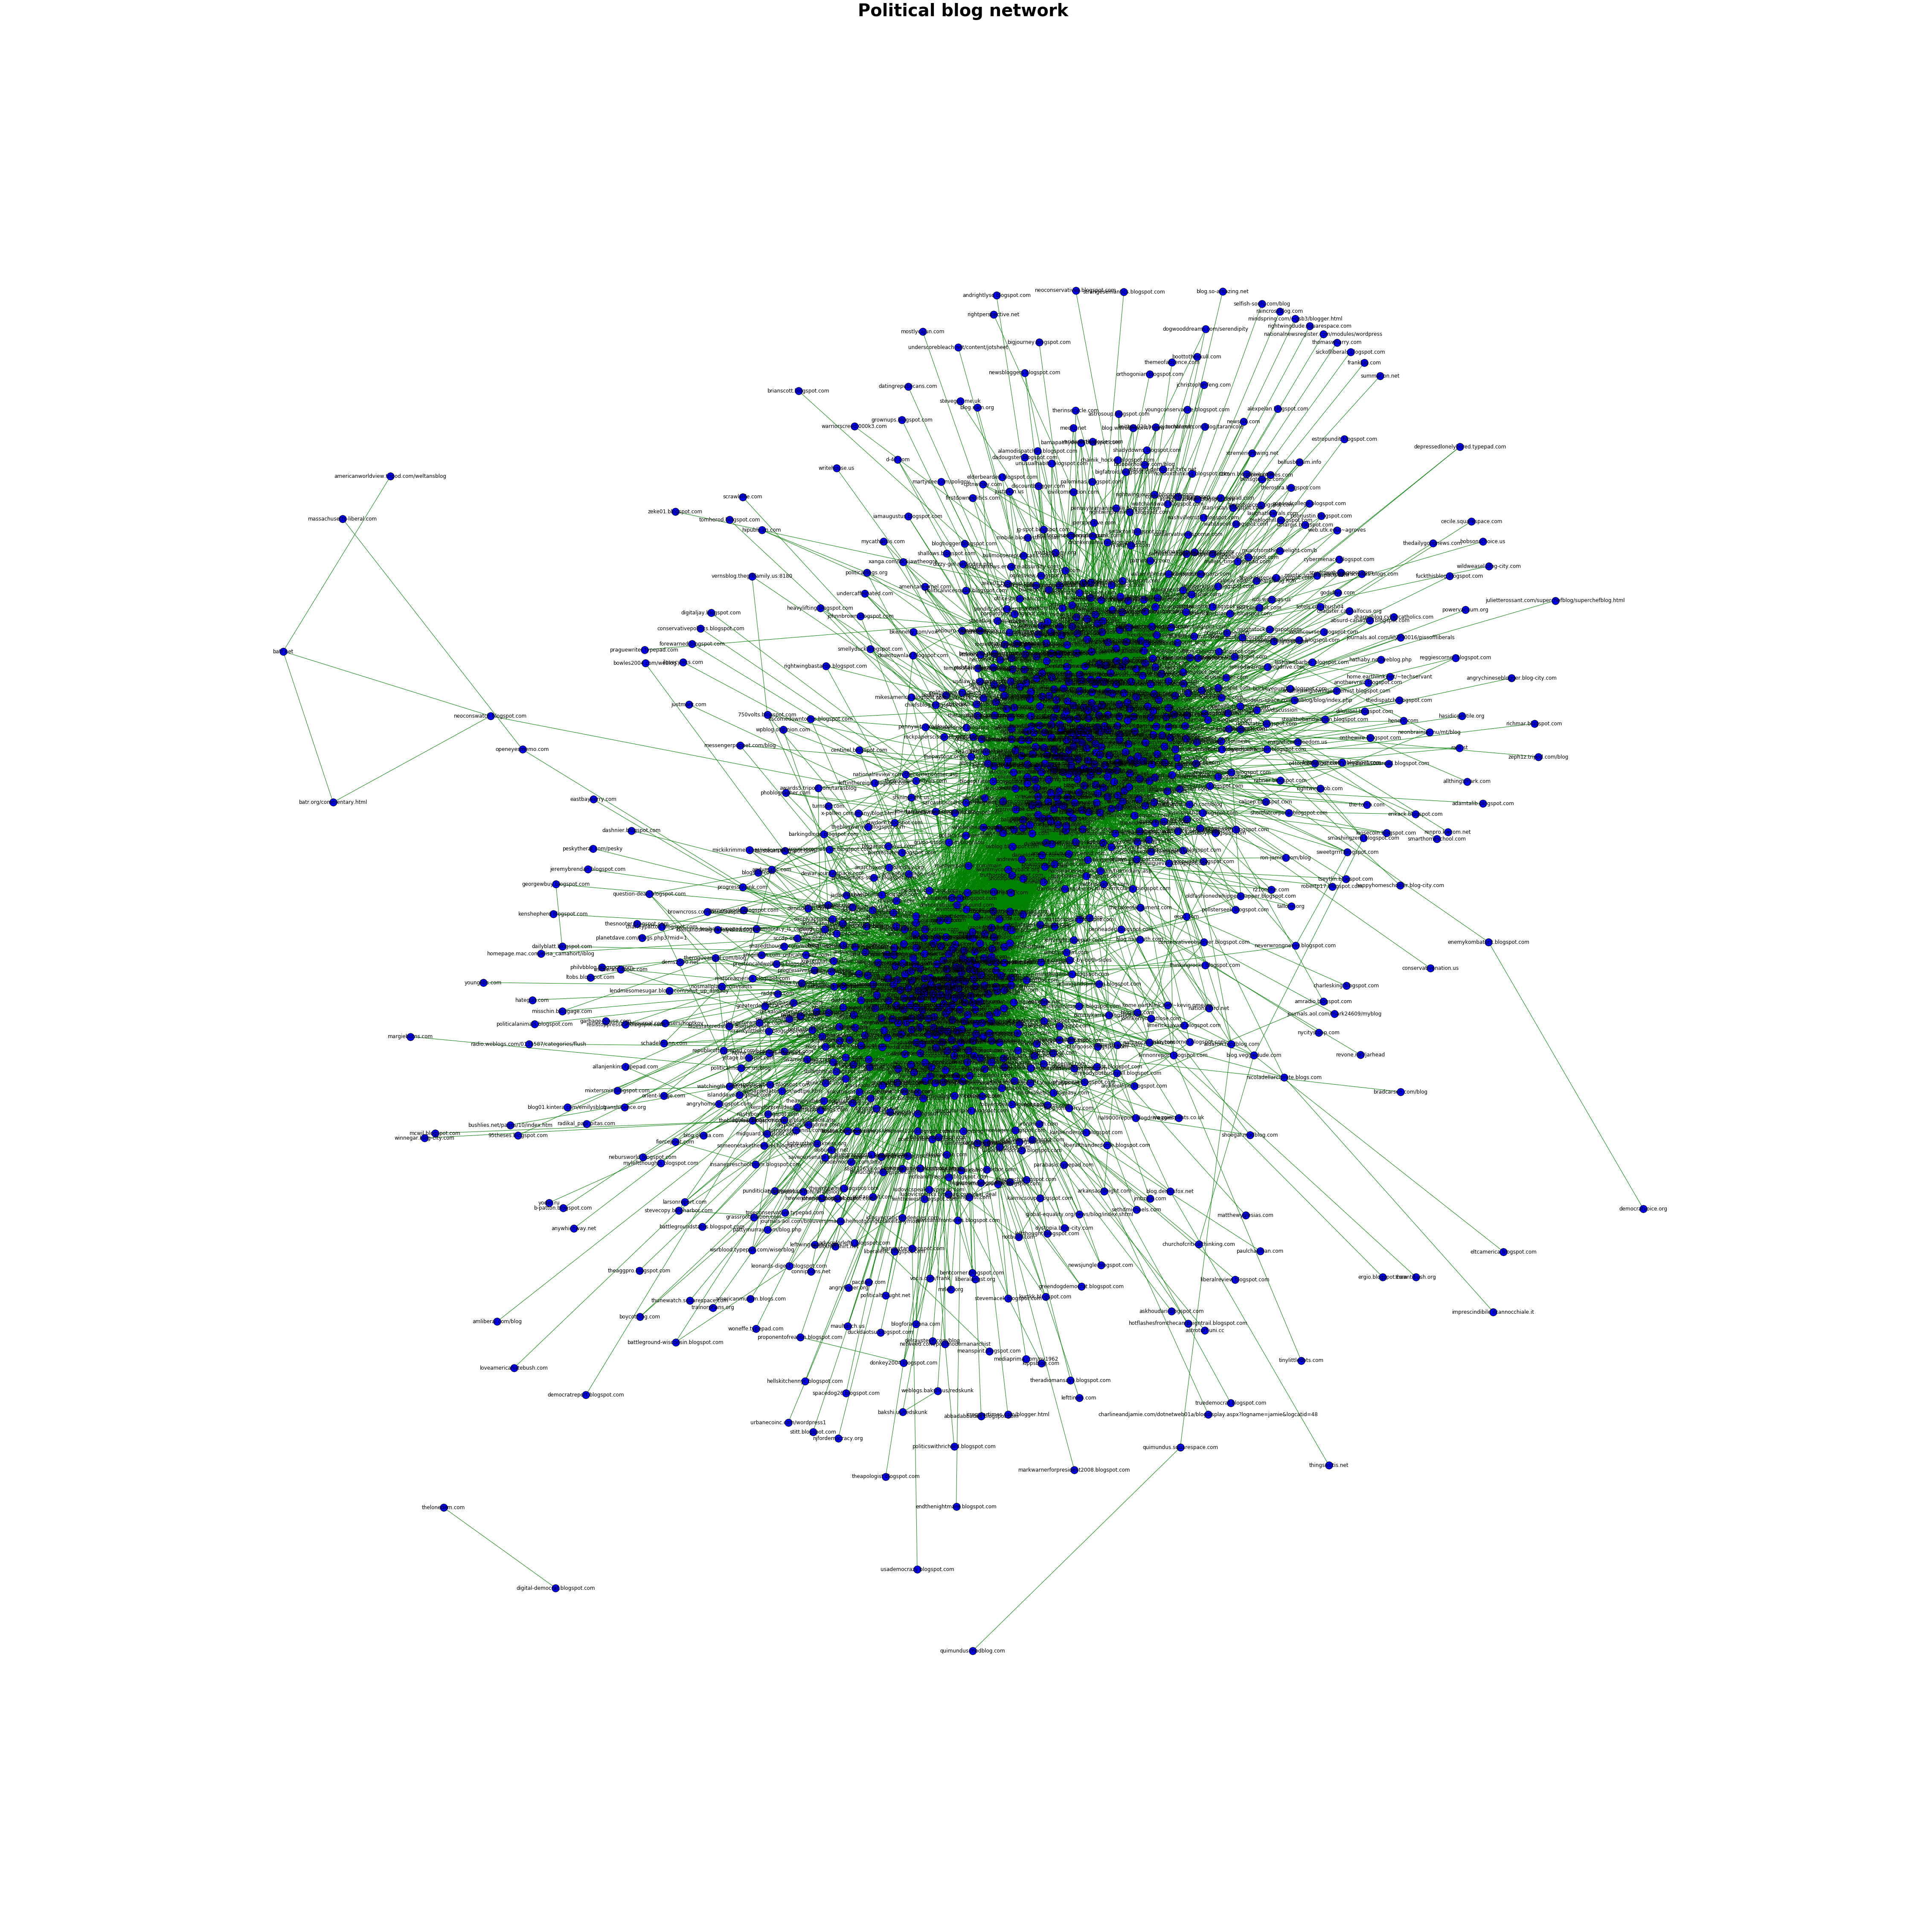

In [19]:
plt.figure(figsize=(80,80))
pos=nx.spring_layout(G, iterations=500, scale=10, k=1)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 40}
plt.title("Political blog network", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=1)
nx.draw_networkx_edges(G,pos,alpha=1,node_size=0,width=1,edge_color='g')
plt.axis('off')
plt.show()

# 2. 10 most influential blogs:

In [11]:
centrality= nx.eigenvector_centrality_numpy(G)

In [12]:
List = []
for node in centrality:
    List.append((node,centrality[node]))

In [13]:
sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
print "10 most influential blogs are:"
sorted_list_desc[0:10]

10 most influential blogs are:


[(u'atrios.blogspot.com', 0.19482295898856775),
 (u'dailykos.com', 0.1609071638581871),
 (u'washingtonmonthly.com', 0.14654050463836443),
 (u'digbysblog.blogspot.com', 0.14265582251978678),
 (u'bodyandsoul.typepad.com', 0.14114853531288907),
 (u'liberaloasis.com', 0.13953785666658594),
 (u'tbogg.blogspot.com', 0.13704857535546866),
 (u'corrente.blogspot.com', 0.12943073134225),
 (u'talkingpointsmemo.com', 0.1270093107829416),
 (u'dneiwert.blogspot.com', 0.12238703900638019)]

#  3. 10 least influential blogs:

In [14]:
sorted_list_asc=sorted(List, key=lambda x: x[1])
print "10 least influential blogs are:"
sorted_list_asc[0:10]

10 least influential blogs are:


[(u'digital-democrat.blogspot.com', -1.4006897354633387e-19),
 (u'thelonedem.com', 4.700620578068348e-19),
 (u'americanworldview.tripod.com/weltansblog', 7.489792407590742e-09),
 (u'quimundus.modblog.com', 6.675725344835501e-08),
 (u'batr.org/commentary.html', 6.79424545479453e-07),
 (u'batr.net', 6.795053204385895e-07),
 (u'democratvoice.org', 1.0221602317239152e-06),
 (u'quimundus.squarespace.com', 6.056497487441748e-06),
 (u'massachusetts-liberal.com', 9.4847117466147e-06),
 (u'thingsasitis.net', 1.1737028626601132e-05)]

# 4. Performing the above tasks on Left wing and Right wing:

In [15]:
color_list=[]
GL=nx.Graph()
GR=nx.Graph()
node=M.nodes(data=True)
for i in range(0, M.number_of_nodes(), 1):
    if node[i][1]['value'] == 1:
        color_list.append('r')
        GR.add_node(node[i][0])
    else:
        color_list.append('b')
        GL.add_node(node[i][0])

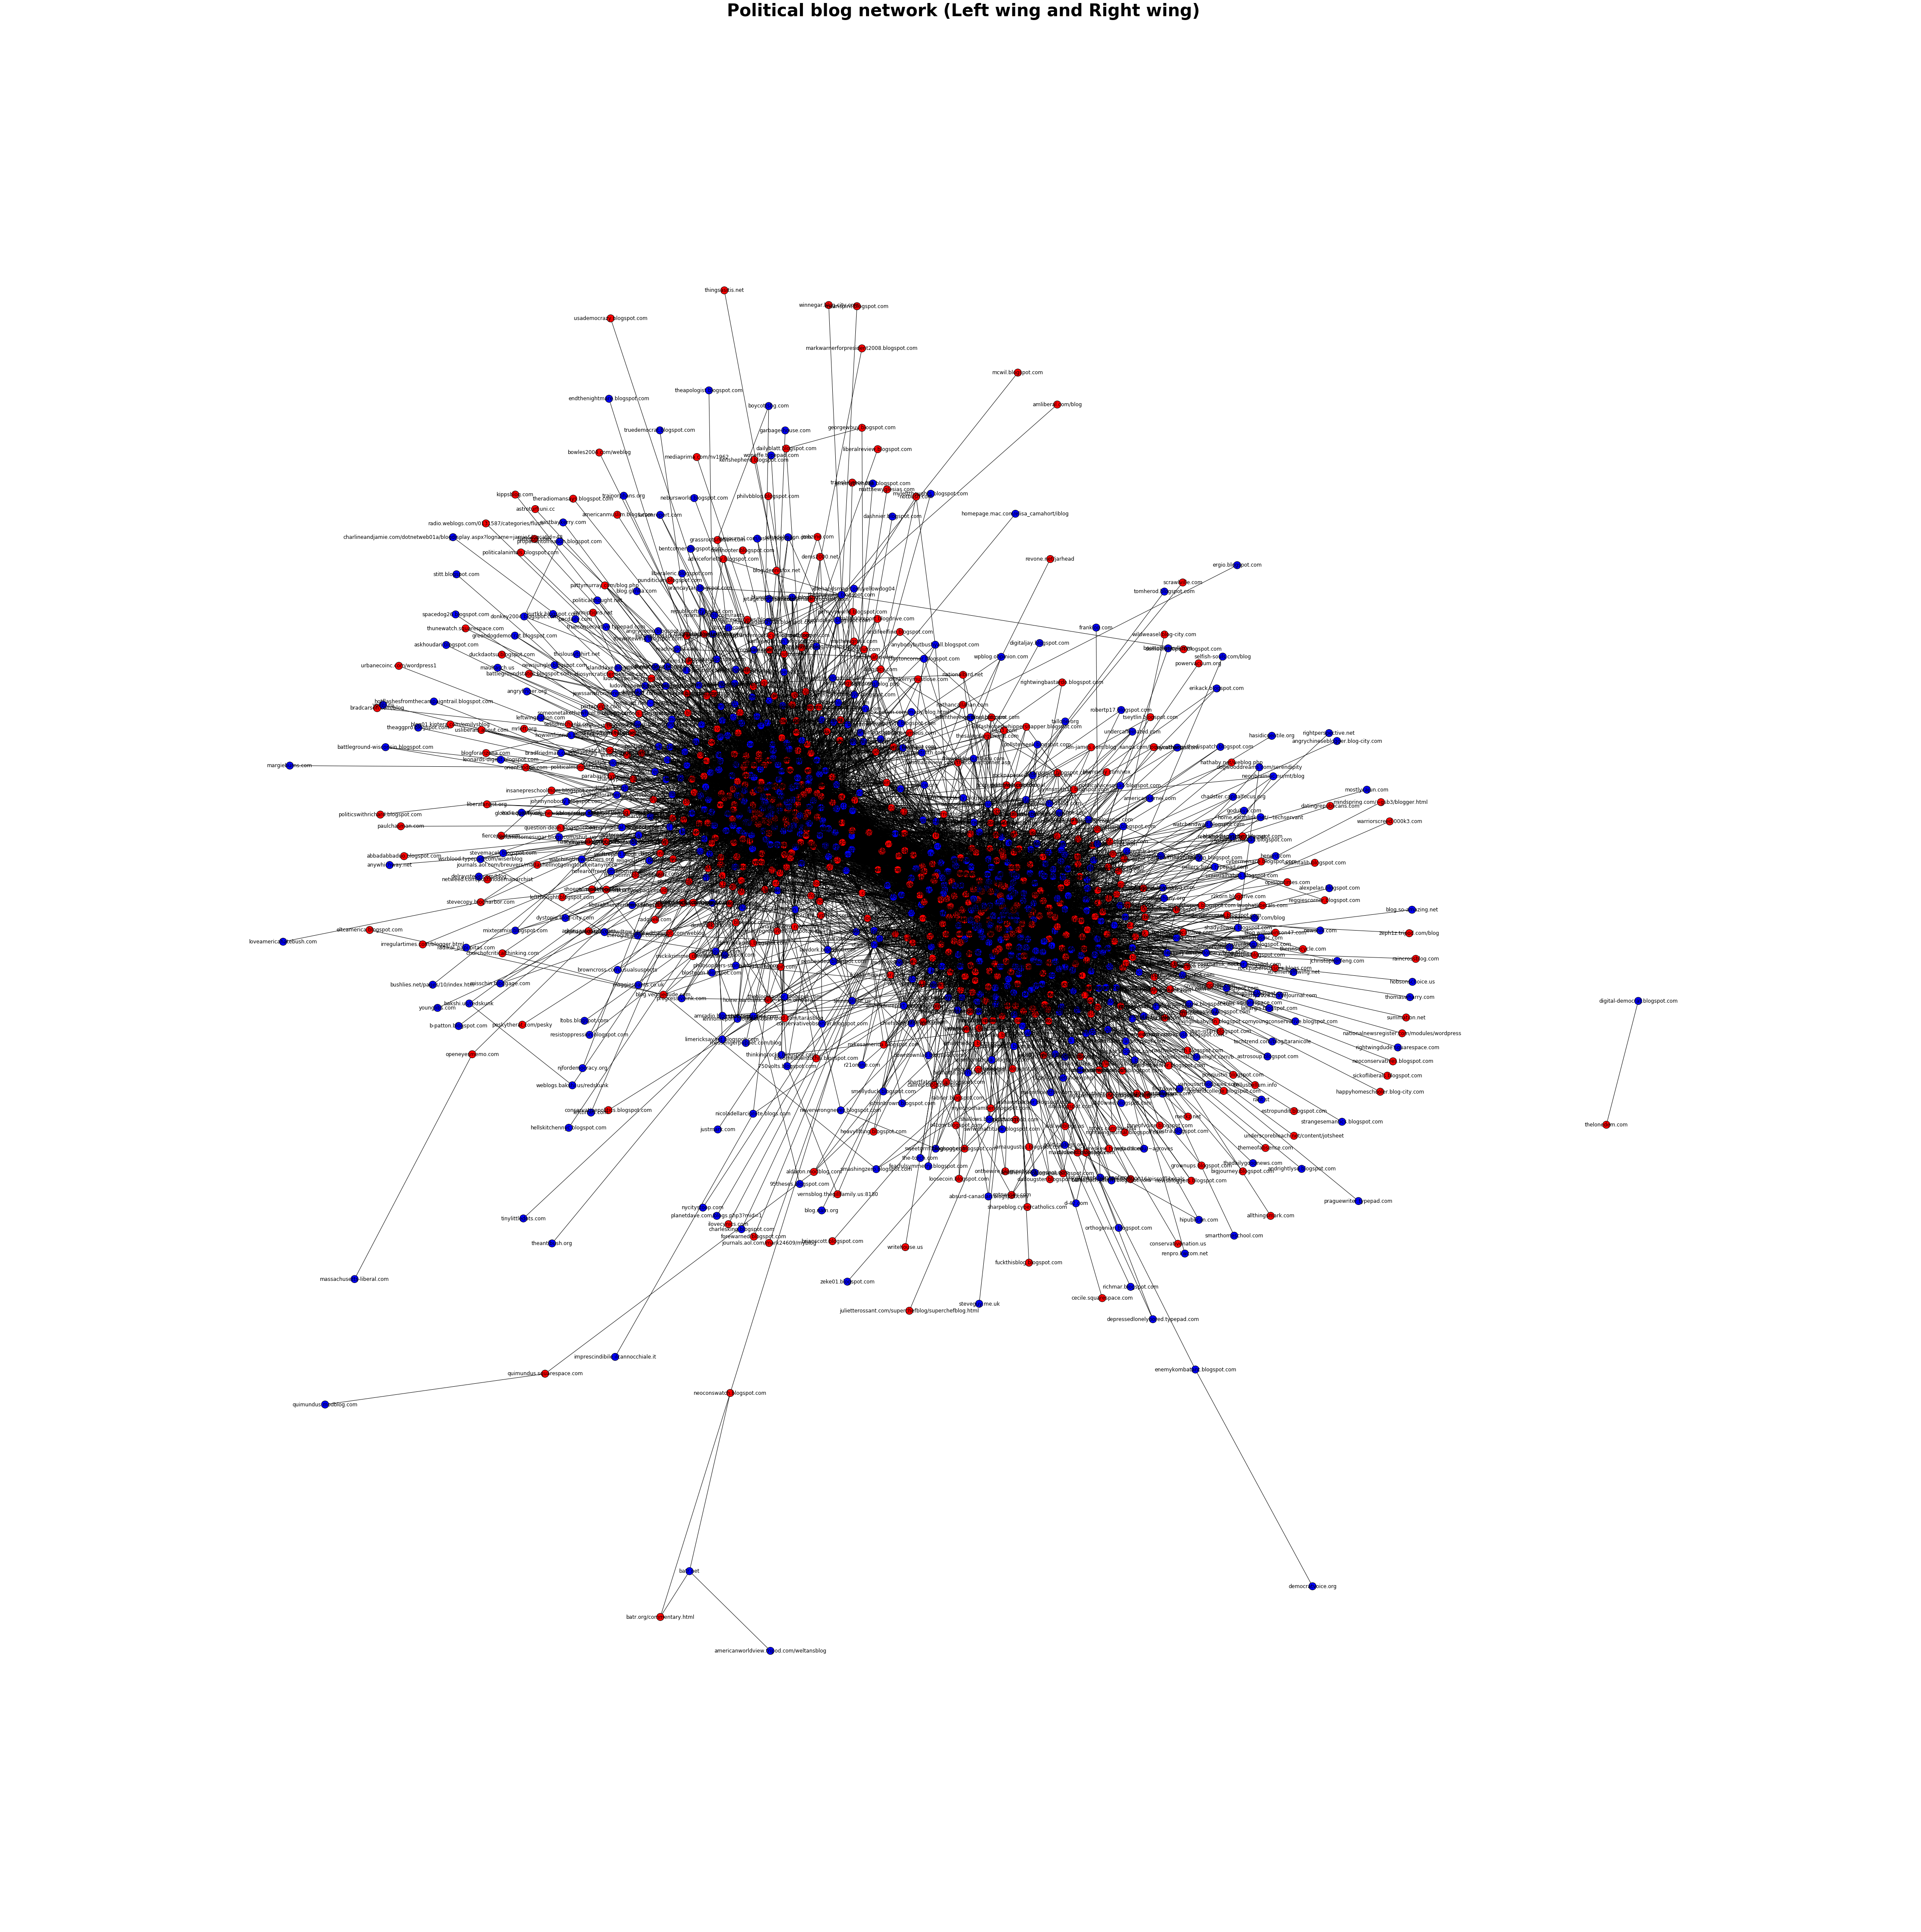

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(80,80))
pos=nx.spring_layout(G, iterations=500, scale=10, k=1)
nx.draw_networkx_labels(G,pos,fontsize=10)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 40}
plt.title("Political blog network (Left wing and Right wing)", font)

nx.draw_networkx_nodes(G,pos,node_color=color_list,alpha=1)
nx.draw_networkx_edges(G,pos,alpha=1,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [20]:
# creating weighted Left wing graph from M
for u,v,data in M.edges_iter(data=True):
    if GL.has_node(u) and GL.has_node(v) and GL.has_edge(u,v) :
        GL[u][v]['weight'] += 1
    elif GL.has_node(u) and GL.has_node(v):
        GL.add_edge(u, v, weight=1)
    else:
        continue

In [21]:
# creating weighted Right wing graph from M
for u,v,data in M.edges_iter(data=True):
    if GR.has_node(u) and GR.has_node(v) and GR.has_edge(u,v) :
        GR[u][v]['weight'] += 1
    elif GR.has_node(u) and GR.has_node(v):
        GR.add_edge(u, v, weight=1)
    else:
        continue

In [22]:
#calculating the centrality of  of Left wing and right wing nodes individually so that it gives the importance of the node in each graph.
centrality_R= nx.eigenvector_centrality_numpy(GR)

In [23]:
centrality_L= nx.eigenvector_centrality_numpy(GL)

In [24]:
def sorting(centrality):
    """
    Takes centality as input.
    Make a list of (node, centrality).
    Sort the List in descending order to get most influential blog at the top.
    Sort the List in ascending order to get least influential blog at the top.
    Returns sorted list(ascending and descending order)
    """
    List = []
    for node in centrality:
        List.append((node,centrality[node]))
    sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
    sorted_list_asc=sorted(List, key=lambda x: x[1])
    return sorted_list_desc, sorted_list_asc

In [25]:
sorted_list_desc_L, sorted_list_asc_L = sorting(centrality_L)

In [26]:
print "10 most influential Left wing blogs are:"
sorted_list_desc_L[0:10]

10 most influential Left wing blogs are:


[(u'atrios.blogspot.com', 0.20959935892096682),
 (u'dailykos.com', 0.16836739525944205),
 (u'bodyandsoul.typepad.com', 0.15679475538395357),
 (u'liberaloasis.com', 0.15611618964885135),
 (u'digbysblog.blogspot.com', 0.1554364456412687),
 (u'tbogg.blogspot.com', 0.15010406230329554),
 (u'corrente.blogspot.com', 0.14485947796783408),
 (u'washingtonmonthly.com', 0.1396807202319527),
 (u'dneiwert.blogspot.com', 0.1347494894326667),
 (u'pandagon.net', 0.13295183425131976)]

In [27]:
print "10 least influential Left wing blogs are:"
sorted_list_asc_L[0:10]

10 least influential Left wing blogs are:


[(u'gabeanderson.com/life', -4.1250093249738455e-18),
 (u'bryan08.tk', -4.028986849744045e-18),
 (u'takeaction.blog-city.com', -3.9254091142217475e-18),
 (u'heysucka.blogspot.com', -3.738744730697185e-18),
 (u'myducksoup.com/blog/bloglib/bloglib.shtml', -3.6931354125021396e-18),
 (u'madamepresident2020.blogspot.com', -3.591322139312377e-18),
 (u'tom_thinks.blogspot.com', -3.481812458999412e-18),
 (u'rudyforfreeholder.org', -3.2591958050676717e-18),
 (u'blotts.org/polilog', -3.2445105015223955e-18),
 (u'xanga.com/kerry4president', -3.16110289626296e-18)]

In [29]:
sorted_list_desc_R, sorted_list_asc_R = sorting(centrality_R)

In [30]:
print "10 most influential Right wing blogs are:"
sorted_list_desc_R[0:10]

10 most influential Right wing blogs are:


[(u'instapundit.com', 0.2113922969759116),
 (u'blogsforbush.com', 0.2031620587596279),
 (u'hughhewitt.com', 0.17091871431714734),
 (u'lashawnbarber.com', 0.15887438313880778),
 (u'michellemalkin.com', 0.14740780092068137),
 (u'powerlineblog.com', 0.1462408881074507),
 (u'wizbangblog.com', 0.14567486363914625),
 (u'littlegreenfootballs.com/weblog', 0.13915353653390375),
 (u'vodkapundit.com', 0.1368134994163516),
 (u'outsidethebeltway.com', 0.12258395519745535)]

In [31]:
print "10 least influential Right wing blogs are:"
sorted_list_asc_R[0:10]

10 least influential Right wing blogs are:


[(u'fooswah.com', -2.4563196363723945e-18),
 (u'getdexview.barrennorth.com', -2.196058834964623e-18),
 (u'gwbblows.blogspot.com', -1.9791757962436184e-18),
 (u'inmyrightmind.com', -1.5552136900515604e-18),
 (u'tweetpetite.blogspot.com', -1.5535637955977334e-18),
 (u'home.earthlink.net/~goodnoughp/index.html', -1.410207259692915e-18),
 (u'republicanresearchcouncil.blogspot.com', -1.399697218281705e-18),
 (u'skinmeister.name', -1.3559600719181062e-18),
 (u'literatevalues.org/virtue.htm', -1.2715107143768863e-18),
 (u'poeticvalues.blogspot.com', -1.1909302114627535e-18)]